In [84]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy

## 1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
## A sample of 40 sales from office  #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Load the mpg dataset and use it to answer the following questions:

### a) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
### b) Are compact cars more fuel-efficient than the average car?
### c) Do manual cars get better gas mileage than automatic cars?

In [107]:
#sample 1
mean1 = 45
sdev1 = 1.9
ssize1 = 1115

#sample 2
mean2 = 49
sdev2= 1.9
ssize2 = 1005

alpha = 0.05
# H_0 : avereage time to sell 1 == average time to sell at office 2

# H-a :average time to sell 2 != average tome t sell at office 2 

In [103]:
x= np.arange(50, 150)
y1= stats.norm(90, 15).pdx(x)
y2 = stats.norm(100, 20).pdf(x)


AttributeError: 'rv_frozen' object has no attribute 'pdx'

In [108]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1,mean2,sdev2,ssize2, equal_var=True)

In [109]:
t

-48.40151153554419

In [110]:
p

0.0

In [111]:
alpha = 0.5
ssize1 = 40
mean1 = 90
sdev1 = 15

ssize2 = 50 
sdev2 = 20 
mean2 = 100


In [112]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1,mean2,sdev2,ssize2, equal_var=True)

In [113]:
p

0.01020985244923939

In [114]:
t

-2.6252287036468456

In [10]:
mpg = data('mpg')

In [115]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999? NO

In [29]:
c_2008 = mpg[mpg.year == 2008].hwy
c_1999 = mpg[mpg.year == 1999].hwy

<AxesSubplot:>

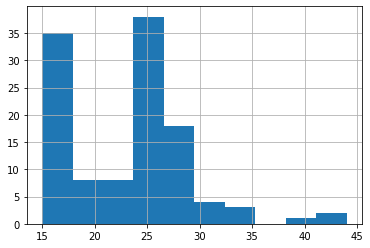

In [28]:
c_1999.hist()

<AxesSubplot:>

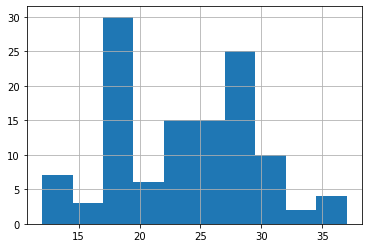

In [30]:
c_2008.hist()

In [31]:
c_2008_cty = mpg[mpg.year == 2008].cty
c_1999_cty = mpg[mpg.year == 1999].cty

<AxesSubplot:>

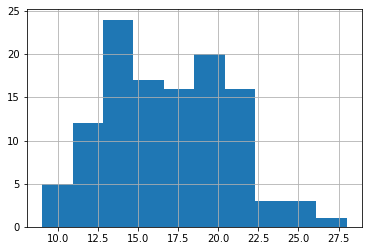

In [32]:
c_2008_cty.hist()

<AxesSubplot:>

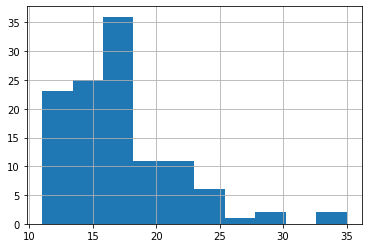

In [33]:
c_1999_cty.hist()

In [35]:
c_2008_cty.var(), c_1999_cty.var()

(16.452844090775127, 19.879015620394938)

In [36]:
c_2008.var(), c_1999.var()

(34.19820218096073, 37.02269378131447)

In [116]:
stats.levene(c_1999,c_2008)

LeveneResult(statistic=0.0212016152523693, pvalue=0.8843574825616618)

In [118]:
t, p = stats.ttest_ind(c_1999,c_2008)
t, p

(-0.03286431672888292, 0.9738110448529322)

run it as a combined avrg/mean next time with cty and hwy together

### Are compact cars more fuel-efficient than the average car?
- h0 : mpg for compact car <= mpg for the average car
- ha: mpg for compact cars > mpg for the average

In [122]:
compact_cars_cty = mpg[mpg['class'] == 'compact'].avg_fe
compact_cars_cty.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1      18
2      21
3      20
4      21
5      16
6      18
7      18
8      18
9      16
10     20
11     19
12     15
13     17
14     17
15     15
142    21
143    19
170    20
171    20
172    19
173    20
187    21
188    21
189    21
190    22
191    18
192    18
193    18
194    24
195    24
196    26
197    28
198    26
208    21
209    19
210    21
211    22
212    17
213    33
214    21
215    19
216    22
217    21
218    21
219    21
220    16
221    17
Name: cty, dtype: int64>

<AxesSubplot:>

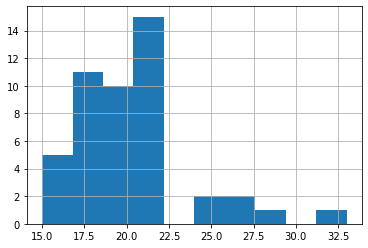

In [120]:
compact_cars_cty.hist()

<AxesSubplot:>

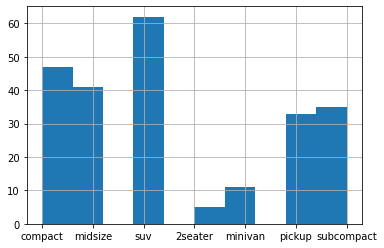

In [89]:
t, p = stats.ttest_1samp(compact_cars_cty, pop_mean)
t,p

In [ ]:
if (p/2 < alpha) and t >0:
    print('reject null')

### Do manual cars get better gas mileage than automatic cars?

In [123]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [124]:
fe_auto = mpg[mpg.trans.str.contains('auto')].mean
fe_manual = mpg[mpg.trans.str.contains('manual')].mean

In [125]:
fe_auto.hist()

AttributeError: 'function' object has no attribute 'hist'

In [ ]:
de_manual.hist()

In [126]:
fe_auto.var(), fe_manual.var()

AttributeError: 'function' object has no attribute 'var'

In [127]:
stats.levene(fe_auto,fe_manual)

TypeError: object of type 'method' has no len()

In [ ]:
t, 